<a href="https://colab.research.google.com/github/mariliafcborba/HotelBooking/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Leitura do dataset

In [42]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
df.shape

(119390, 36)

#Verificando se há valores nulos / dados ausentes

In [45]:
# Verificando se há valores nulos
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [46]:
# Verificando a quantidade de valores nulos no dataset
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

#Tratamento dos dados ausentes

In [47]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [48]:
df.dropna(axis=0, inplace=True, subset=['children'])

In [49]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [50]:
df.dropna(axis=0, inplace=True, subset=['country'])

In [51]:
df['agent'].replace(np.nan, 'No agent', inplace=True)

In [52]:
df['company'].replace(np.nan, 'No company', inplace=True)

In [53]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

#Análise exploratória dos dados

In [54]:
#De qual país vem a maioria dos viajantes?
count_country=df.groupby(by='country')['name'].count()
count_country=count_country.sort_values(ascending=False)
df_count_country=pd.DataFrame(count_country)

print("A maioria dos viajantes vem de:\n ",count_country[:1])

print("\nListe os 5 países com mais passageiros.\n",count_country[:5])

A maioria dos viajantes vem de:
  country
PRT    48586
Name: name, dtype: int64

Liste os 5 países com mais passageiros.
 country
PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: name, dtype: int64


#Visualização de dados

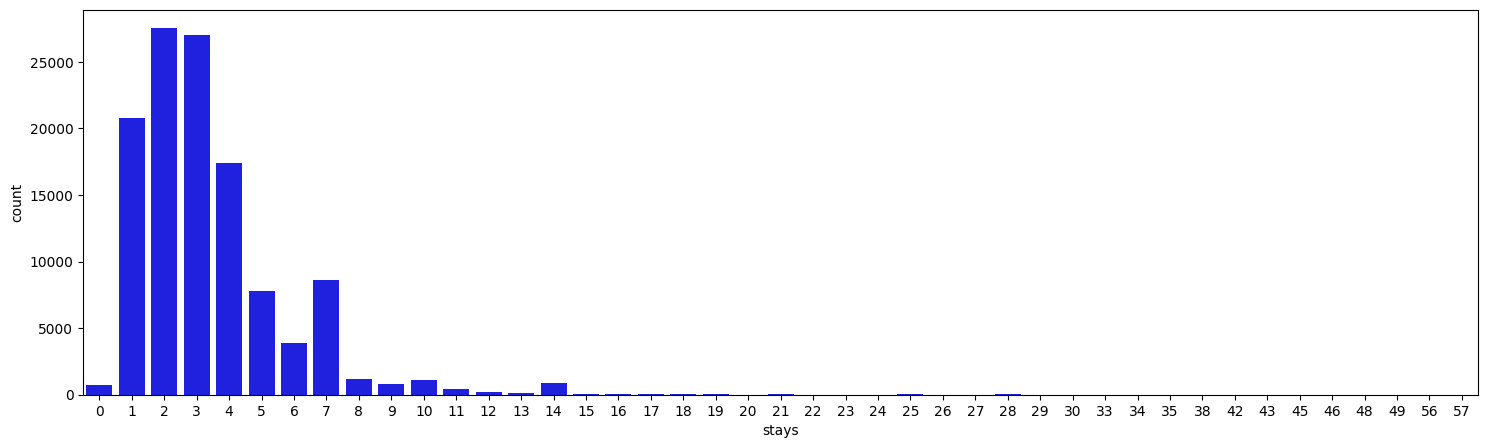

In [55]:
#Visualização de estadias
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='b')
plt.show()

([<matplotlib.patches.Wedge at 0x7ff5cc9031f0>,
 [Text(-1.0113763824572926, -0.4325711652521476, 'Not Canceled'),
  Text(1.0113763419570527, 0.432571259944036, 'Canceled')],
 [Text(-0.551659844976705, -0.23594790831935322, '62.9%'),
  Text(0.5516598228856651, 0.23594795996947415, '37.1%')])

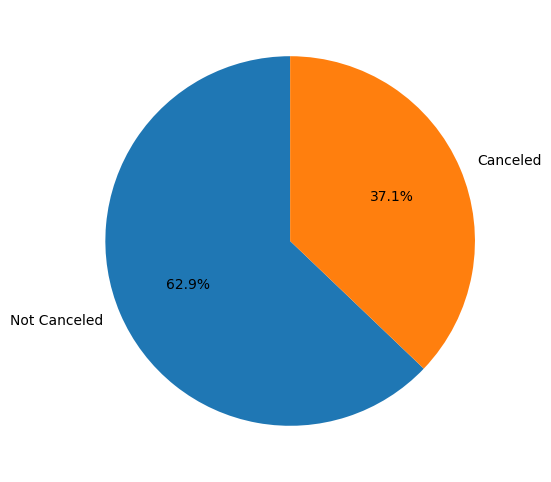

In [56]:
#Porcentagem de cancelamentos
num_can= df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

<Axes: xlabel='hotel', ylabel='is_canceled'>

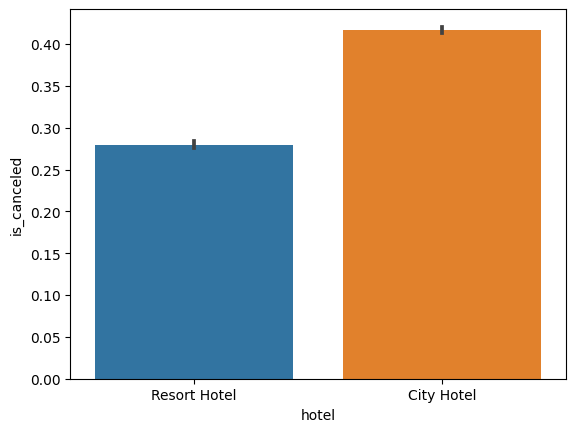

In [57]:
#Qual hotel tem mais cancelamentos?
sns.barplot(data=df,x="hotel",y="is_canceled")

Como podemos ver, o City Hotel possui um número maior de cancelamentos em comparação com o Resort Hotel.

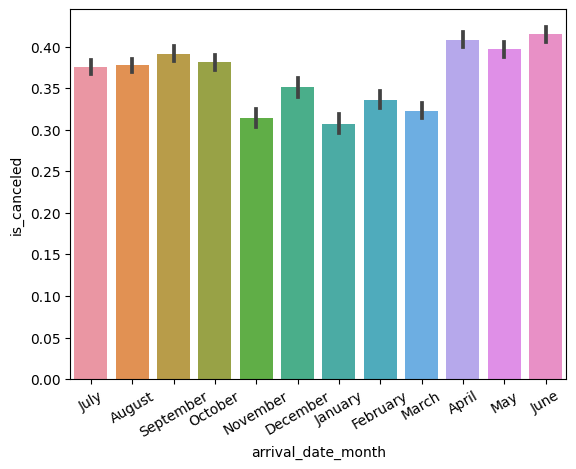

In [61]:
sns.barplot(x='arrival_date_month', y='is_canceled', data=df)
plt.xticks(rotation = 30)
plt.show()